In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# from here: http://ourairports.com/data/airports.csv
file = 'airports.csv'

df = pd.read_csv(file)

In [4]:
df

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR
5,322127,00AS,small_airport,Fulton Airport,34.942803,-97.818019,1100.0,NaN,US,US-OK,Alex,no,00AS,NaN,00AS,NaN,NaN,NaN
6,6527,00AZ,small_airport,Cordes Airport,34.305599,-112.165001,3810.0,NaN,US,US-AZ,Cordes,no,00AZ,NaN,00AZ,NaN,NaN,NaN
7,6528,00CA,small_airport,Goldstone /Gts/ Airport,35.350498,-116.888000,3038.0,NaN,US,US-CA,Barstow,no,00CA,NaN,00CA,NaN,NaN,NaN
8,324424,00CL,small_airport,Williams Ag Airport,39.427188,-121.763427,87.0,NaN,US,US-CA,Biggs,no,00CL,NaN,00CL,NaN,NaN,NaN
9,322658,00CN,heliport,Kitchen Creek Helibase Heliport,32.727374,-116.459742,3350.0,NaN,US,US-CA,Pine Valley,no,00CN,NaN,00CN,NaN,NaN,NaN


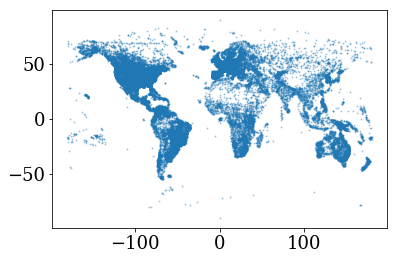

In [5]:
plt.scatter(df['longitude_deg'], df['latitude_deg'], s=1, alpha=0.3)

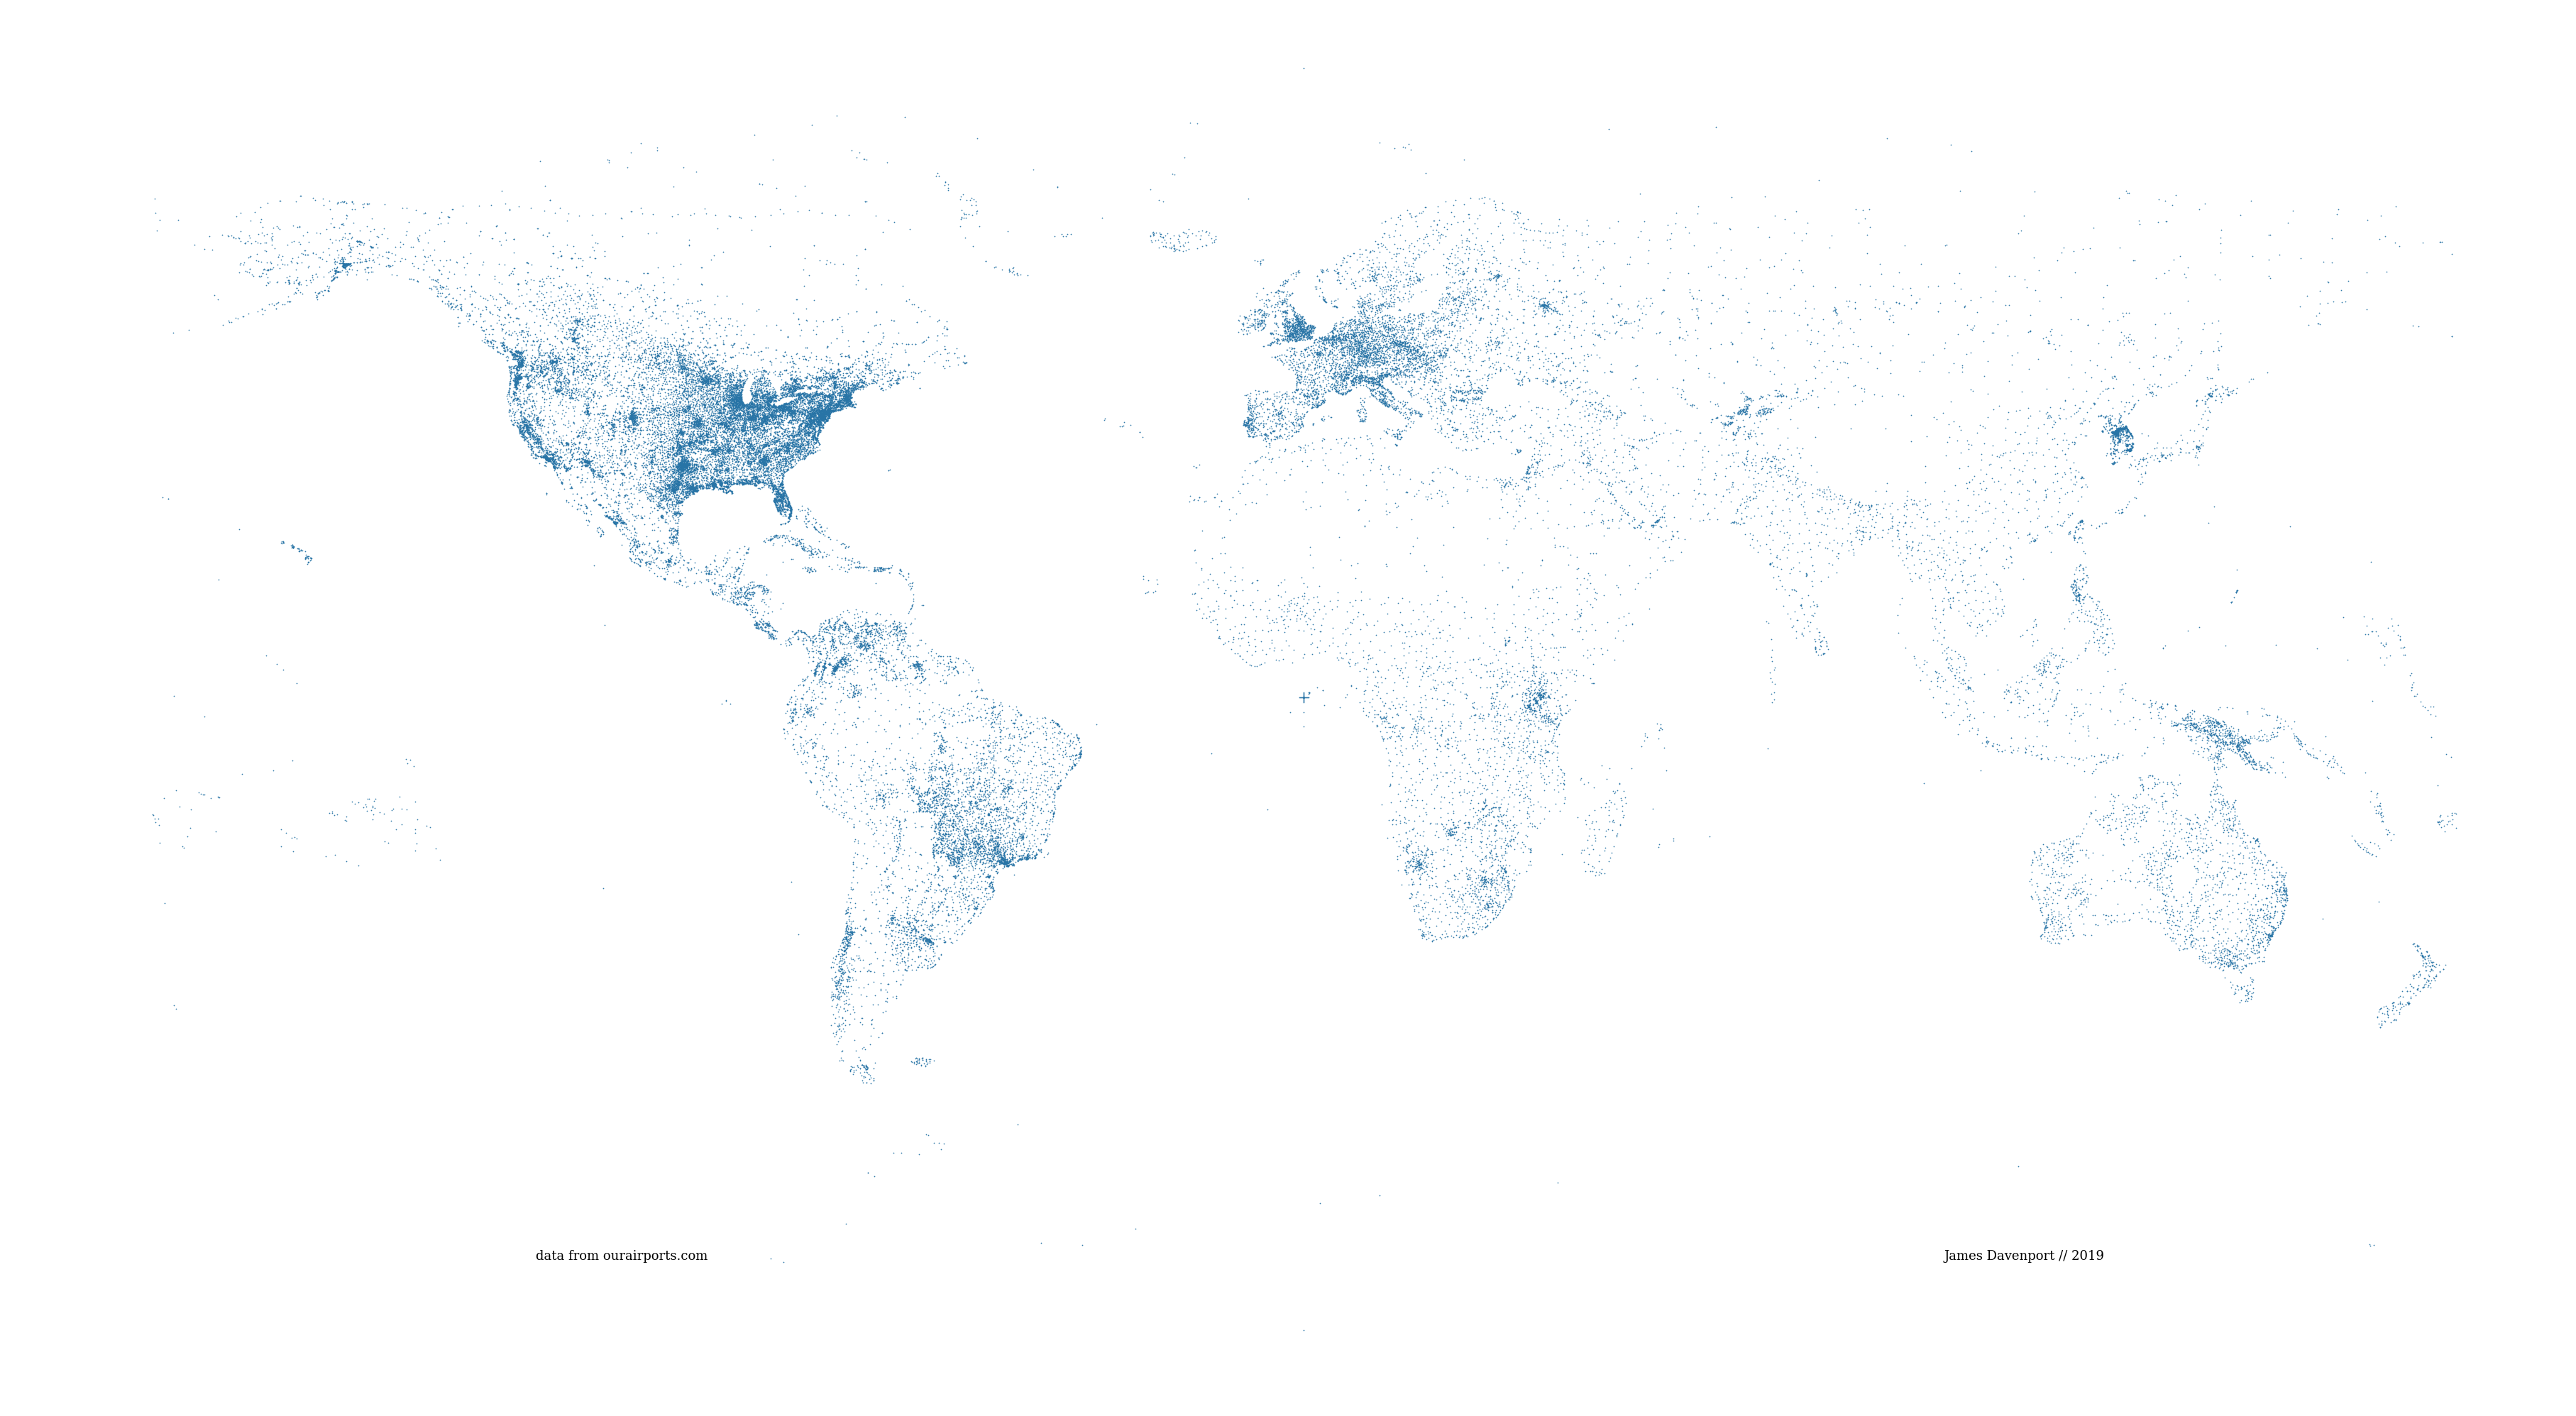

In [38]:
plt.figure(figsize=(64,36))

plt.scatter(df['longitude_deg'], df['latitude_deg'], 
            s=2, alpha=0.95, c='#2874A6', marker='.')

plt.axis('off')

plt.text(100,-80, 'James Davenport // 2019')
plt.text(-120, -80, 'data from ourairports.com')
plt.savefig("airport_map2019.jpeg", bbox_inches='tight', dpi=250)

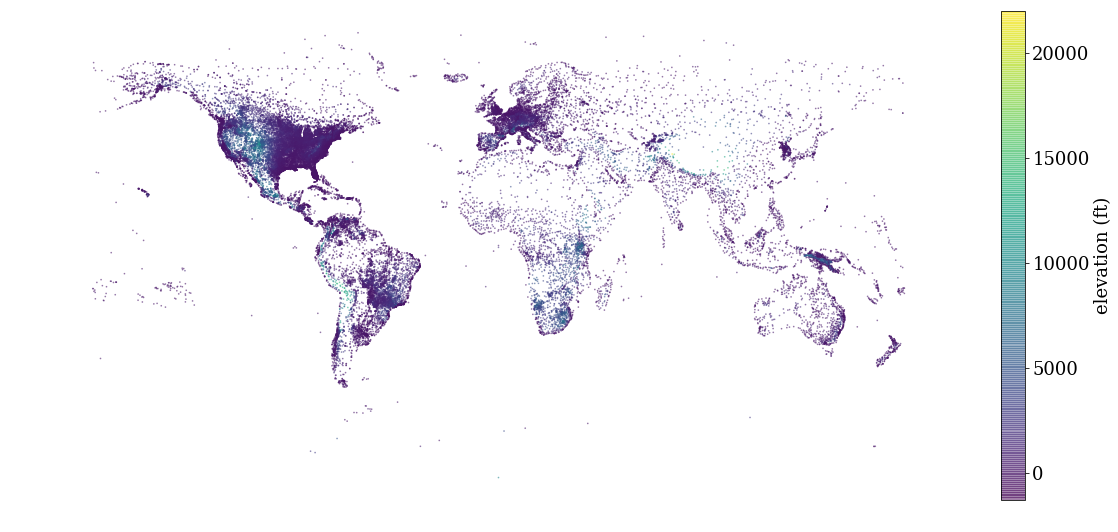

In [30]:
plt.figure(figsize=(20,9))

plt.scatter(df['longitude_deg'], df['latitude_deg'], 
            s=2, alpha=0.5, c=df['elevation_ft'], marker='.')

plt.axis('off')
cb = plt.colorbar()
cb.set_label('elevation (ft)')

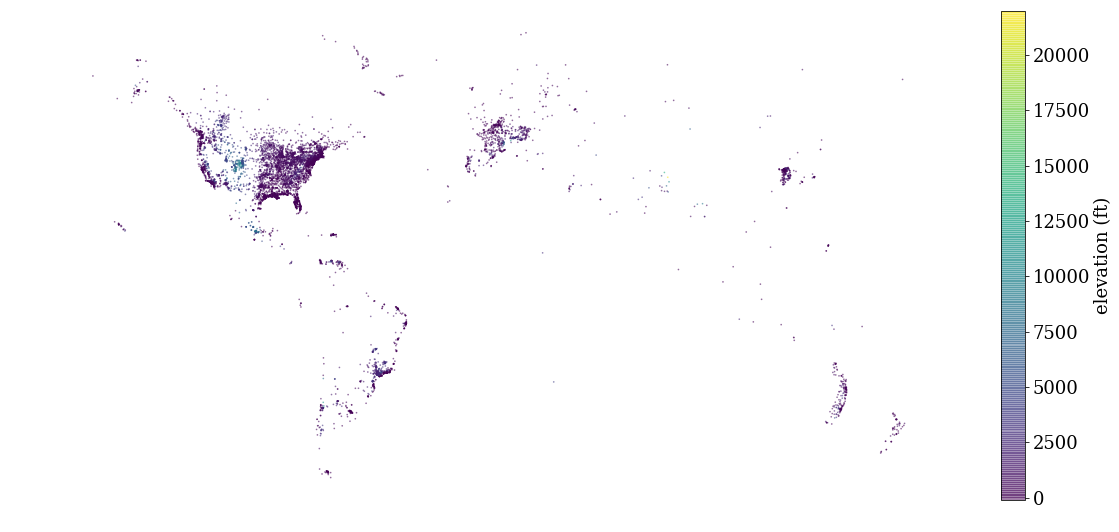

In [29]:
hp = df['type'] == 'heliport'

plt.figure(figsize=(20,9))

plt.scatter(df['longitude_deg'][hp], df['latitude_deg'][hp], 
            s=2, alpha=0.5, c=df['elevation_ft'][hp], marker='.')

plt.axis('off')
cb = plt.colorbar()
cb.set_label('elevation (ft)')